In [1]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# データを読みこむ
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
# 何を可視化すれか判断しよう
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

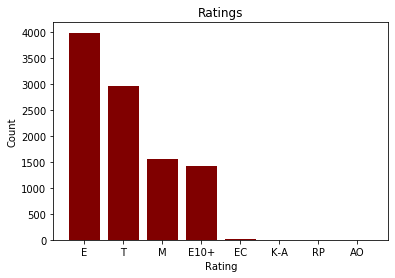

<Figure size 360x360 with 0 Axes>

In [4]:
#  Ratingの度数を数えよ
# -- 欠損値の掃除をしなきゃ
ratings_c = games.Rating.dropna()
# 簡単な棒グラフ
plt.bar(ratings_c.value_counts().index,
        ratings_c.value_counts().values, 
        color = 'maroon')
plt.title("Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.figure(figsize = (5,5))
plt.show()

RPとK−AとAOは何の批判（Rating?）か？

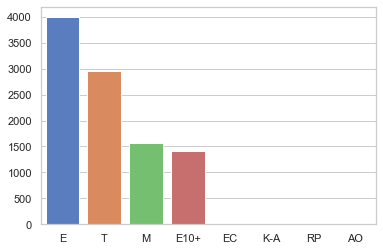

In [19]:
# Seabornを使ってみよう
#sns.set(style="whitegrid") # もっと知る
sns.barplot(x=ratings_c.value_counts().index, 
            y=ratings_c.value_counts().values, 
            data=games,
           palette="muted")
plt.show()

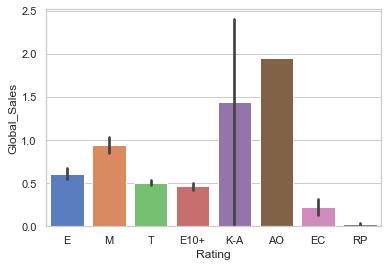

In [21]:
sns.barplot(x="Rating", 
            y="Global_Sales", 
            data=games,
           palette="muted")
plt.show()

これを見ると、Mがもっとも売られたゲームの（）に気がつく。棒のなかにある棒は？

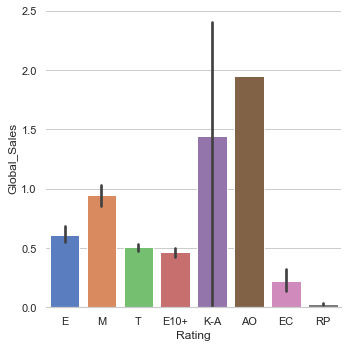

In [29]:
sns.catplot(x="Rating",
            y="Global_Sales", 
            data=games,
            kind="bar",
            palette="muted")
sns.despine(left = True)
plt.show()

そして、seabornはplotlibより綺麗だよね。

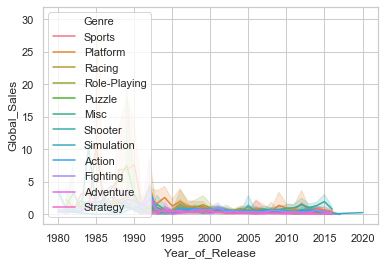

In [41]:
# 折れ線グラフを作ろう
sns.lineplot(x = "Year_of_Release", y = "Global_Sales", data = games, hue = "Genre")
plt.show()

８０年代と９０年代は商売のために一番いい年代だったね。だが、お金の価値は同じであった？

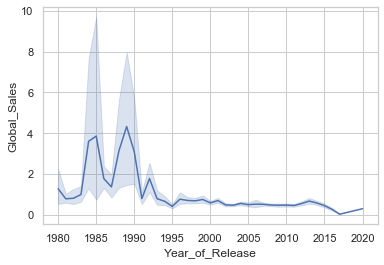

In [39]:
# 折れ線グラフを作ろう
sns.lineplot(x = "Year_of_Release", y = "Global_Sales", data = games)
plt.show()

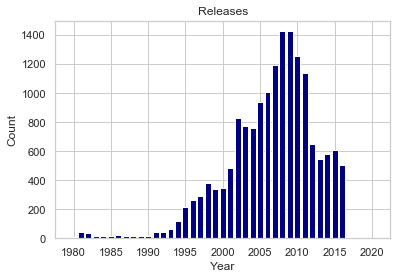

In [28]:
# 出版年
release_c = games.Year_of_Release.dropna()
plt.bar(release_c.value_counts().index,
       release_c.value_counts().values, 
       color = 'navy')
plt.title("Releases")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

きっとヒストグラムはもっと相応しいだろう。

多分、棒グラフのデータを分類したら、もっと綺麗になる。

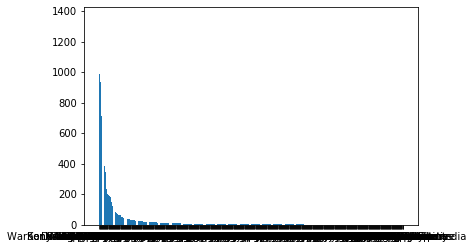

In [81]:
# 出版社
publisher_c = games.Publisher.dropna()
plt.bar(publisher_c.value_counts().index,
       publisher_c.value_counts().values)
plt.show()

出版社は多すぎる。

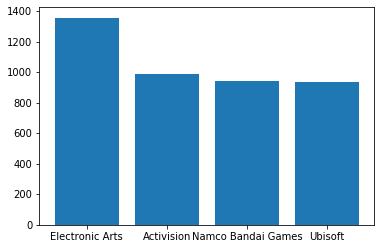

In [86]:
# 出版社
publisher_c = games.Publisher.dropna()
plt.bar(publisher_c.value_counts().index[0:4],
       publisher_c.value_counts().values[0:4])
plt.show()

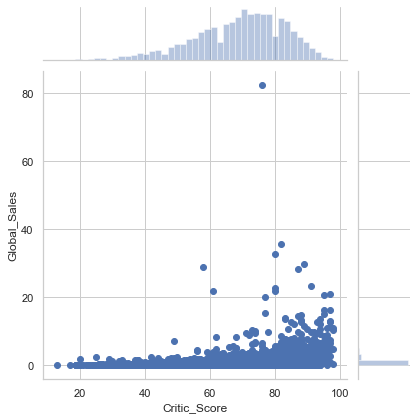

In [44]:
# 散布図
sns.jointplot(x="Critic_Score", y="Global_Sales", data=games)
plt.show()

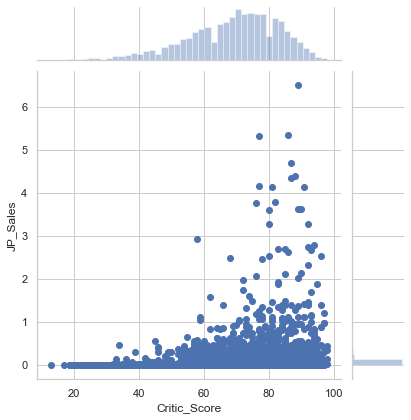

In [45]:
# 散布図
sns.jointplot(x="Critic_Score", y="JP_Sales", data=games)
plt.show()

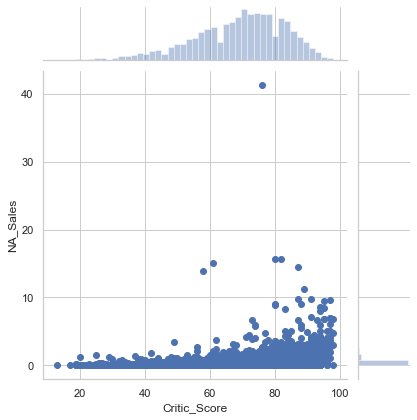

In [48]:
# 散布図
sns.jointplot(x="Critic_Score", y="NA_Sales", data=games)
plt.show()

相関関係なし。

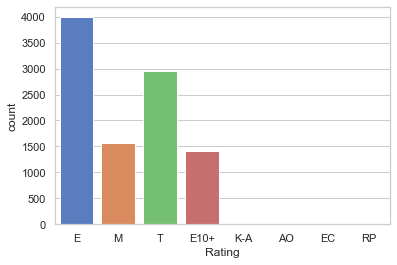

In [50]:
sns.countplot(x = "Rating", data = games, palette = "muted")
plt.show()

ここで、何かをよく学んだ。度数とglobal_salesは同じではなく！